In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("cost_revenue_dirty.csv", index_col="Rank")
df.sort_values("Rank", inplace=True)

In [ ]:
df.shape

(5391, 6)

In [ ]:
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5386    False
5387    False
5388    False
5389    False
5390    False
Length: 5391, dtype: bool

In [ ]:
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
chars_to_remove = [',', '$']

for col in columns_to_clean:
  for char in chars_to_remove:
    df[col] = df[col].astype(str).str.replace(char, '')
  df[col] = pd.to_numeric(df[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


**Investigate the Films that had Zero Revenue**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5391 entries, 1 to 5391
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Release_Date           5391 non-null   object
 1   Movie_Title            5391 non-null   object
 2   USD_Production_Budget  5391 non-null   int64 
 3   USD_Worldwide_Gross    5391 non-null   int64 
 4   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 252.7+ KB


In [ ]:
df.Release_Date = pd.to_datetime(df.Release_Date)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5391 entries, 1 to 5391
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Release_Date           5391 non-null   datetime64[ns]
 1   Movie_Title            5391 non-null   object        
 2   USD_Production_Budget  5391 non-null   int64         
 3   USD_Worldwide_Gross    5391 non-null   int64         
 4   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 252.7+ KB


In [ ]:
df.head(3)

,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
Rank,,,,,
1,2009-12-18,Avatar,425000000,2783918982,760507625
2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425


In [ ]:
df.USD_Production_Budget.mean()

31113737.57837136

In [ ]:
df.USD_Worldwide_Gross.mean()

88855421.96271564

In [ ]:
print(f"Production Budget Gross = {df.USD_Production_Budget.describe()[4]}")
print(f"Domestic Gross = {df.USD_Domestic_Gross.describe()[4]}")
print(f"Worldwide Gross = {df.USD_Worldwide_Gross.describe()[4]}")



Production Budget Gross = 5000000.0
Domestic Gross = 1330901.5
Worldwide Gross = 3865206.0


In [ ]:
print(f"highest production Budget: {df.USD_Production_Budget.max()}")
print(f"highest production Budget: {df.USD_Production_Budget.max()}")

highest production Budget: 425000000


In [ ]:
data = df
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 512


,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
Rank,,,,,
96,2020-12-31,Singularity,175000000,0,0
126,2018-12-18,Aquaman,160000000,0,0
321,2018-09-03,A Wrinkle in Time,103000000,0,0
366,2018-10-08,Amusement Park,100000000,0,0
556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...
5371,2014-12-31,Stories of Our Lives,15000,0,0
5374,2007-12-31,Tin Can Man,12000,0,0
5381,2015-05-19,Family Motocross,10000,0,0


In [ ]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 worldwide 357


,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
Rank,,,,,
96,2020-12-31,Singularity,175000000,0,0
126,2018-12-18,Aquaman,160000000,0,0
321,2018-09-03,A Wrinkle in Time,103000000,0,0
366,2018-10-08,Amusement Park,100000000,0,0
879,2017-04-08,The Dark Tower,60000000,0,0
...,...,...,...,...,...
5371,2014-12-31,Stories of Our Lives,15000,0,0
5374,2007-12-31,Tin Can Man,12000,0,0
5381,2015-05-19,Family Motocross,10000,0,0


**Filter on Multiple Conditions: International Films**

In [ ]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]

In [ ]:
print(len(international_releases))

155


In [ ]:
international_releases.head()

,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
Rank,,,,,
556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
1230,2012-12-31,Foodfight!,45000000,73706,0
1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
1271,2015-12-31,Pourquoi j'ai pas mangé mon père,42000000,182156,0


**Using the .query() function to filter on multiple conditions**

In [ ]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

In [ ]:
print(len(international_releases))

155


In [ ]:
international_releases.tail()

,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
Rank,,,,,
5206,2015-03-24,Along the Roadside,250000,3234,0
5267,2015-12-31,Lumea e a mea,168000,29827,0
5276,2013-12-31,Speak No Evil,150000,32927,0
5319,2011-12-31,Absentia,70000,8555,0
5359,2015-01-09,Backmask,25000,428923,0


In [ ]:
international_releases

,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
Rank,,,,,
556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
1230,2012-12-31,Foodfight!,45000000,73706,0
1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
1271,2015-12-31,Pourquoi j'ai pas mangé mon père,42000000,182156,0
...,...,...,...,...,...
5206,2015-03-24,Along the Roadside,250000,3234,0
5267,2015-12-31,Lumea e a mea,168000,29827,0
5276,2013-12-31,Speak No Evil,150000,32927,0


There are total 155 movies that 0 domestic gross and worldwide gorss > 0.

In [ ]:
not_released_yet = data.query('Release_Date > "2018-05-01"')

In [ ]:
print(len(not_released_yet))

7


In [ ]:
not_released_yet.head(7)

,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
Rank,,,,,
96,2020-12-31,Singularity,175000000,0,0
126,2018-12-18,Aquaman,160000000,0,0
321,2018-09-03,A Wrinkle in Time,103000000,0,0
366,2018-10-08,Amusement Park,100000000,0,0
1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0
2950,2018-10-08,Meg,15000000,0,0


**Removing the unreleased films**

In [ ]:
data_clean = data.drop(not_released_yet.index)

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5384 entries, 1 to 5391
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Release_Date           5384 non-null   datetime64[ns]
 1   Movie_Title            5384 non-null   object        
 2   USD_Production_Budget  5384 non-null   int64         
 3   USD_Worldwide_Gross    5384 non-null   int64         
 4   USD_Domestic_Gross     5384 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 252.4+ KB


**Budget greater than revenue**

In [ ]:
money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
len(money_losing)/len(data_clean)

0.37277117384843983

# Seaborn Data Visualisation: Bubble Charts

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

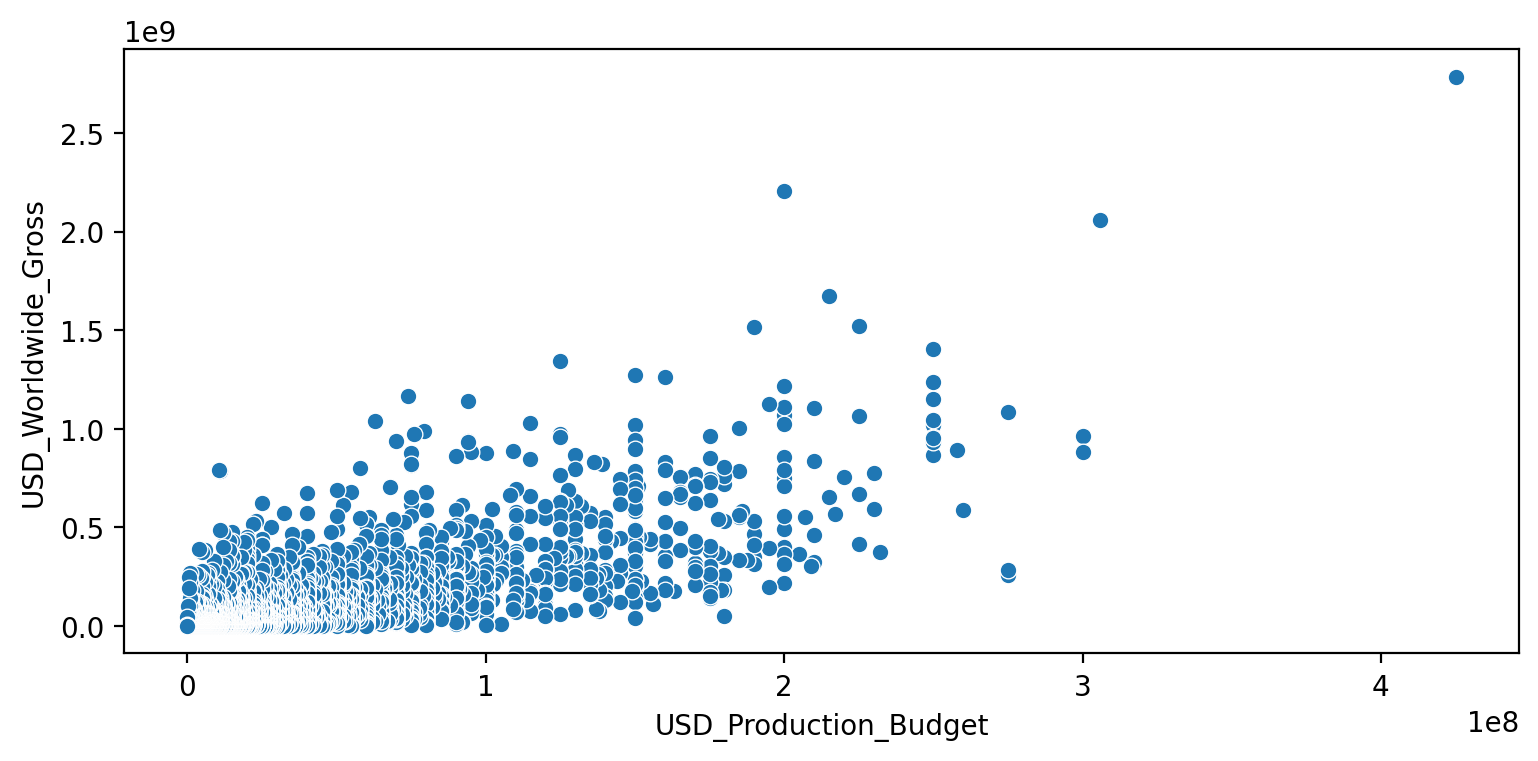

In [ ]:
plt.figure(figsize=(9,4), dpi=200)
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')

plt.show()

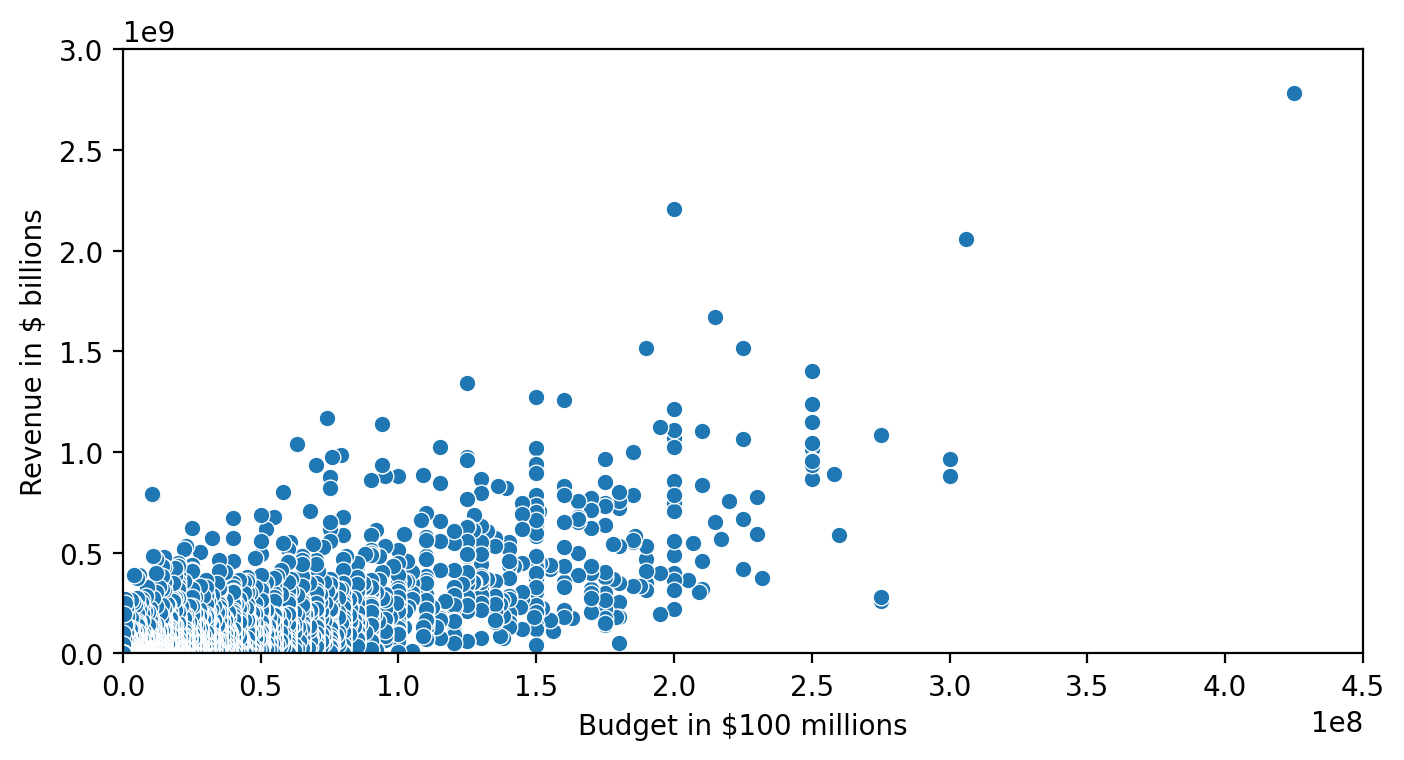

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
 
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
 
plt.show()

**From Scatter Plot to Bubble Chart**

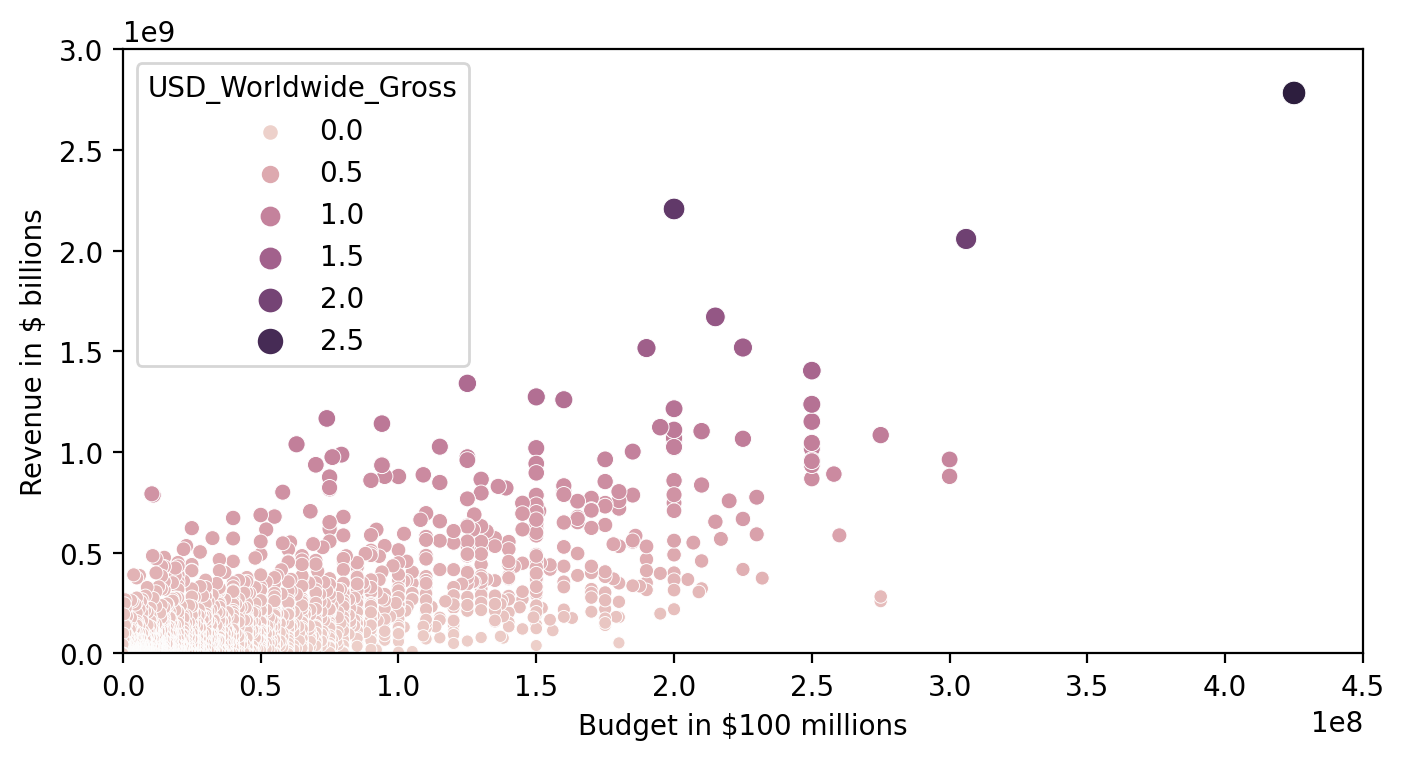

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

**darkgrid style**

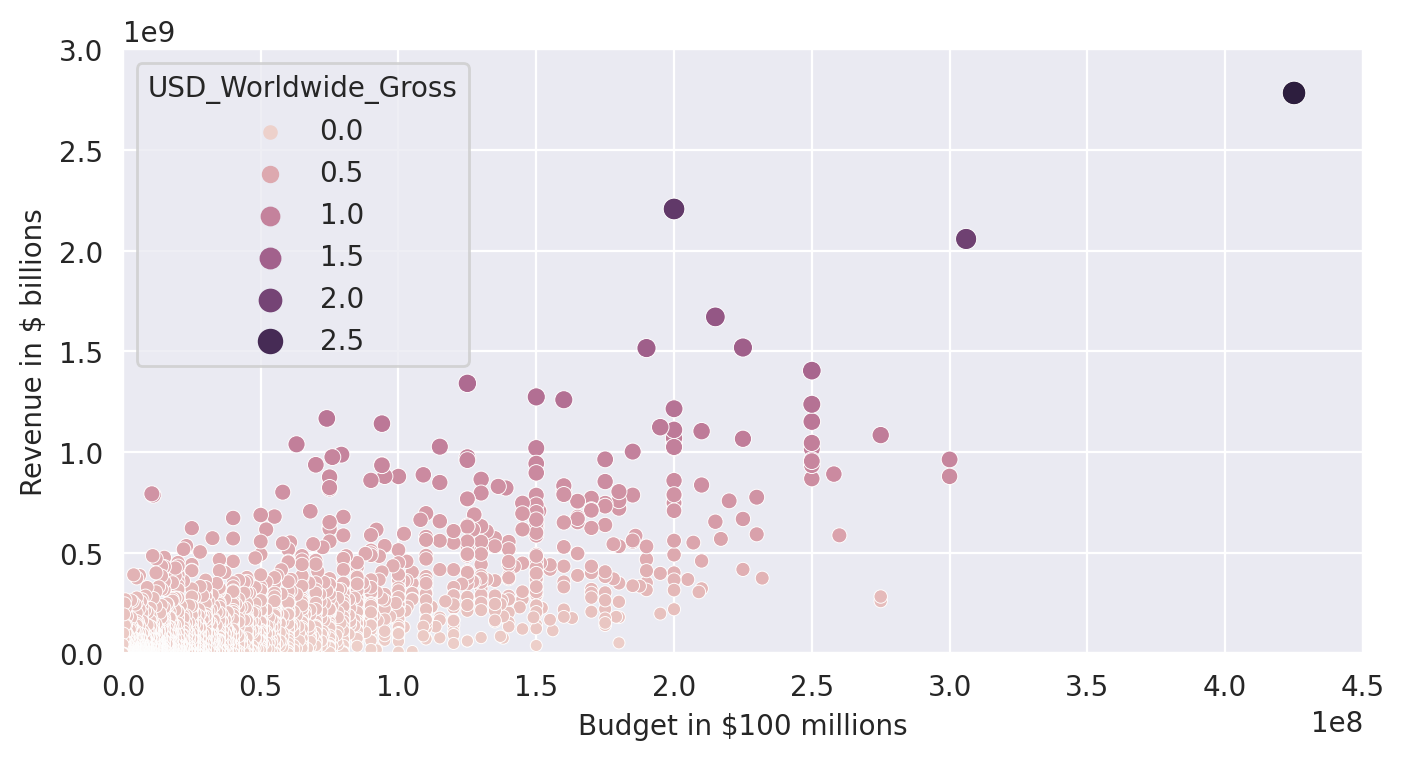

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

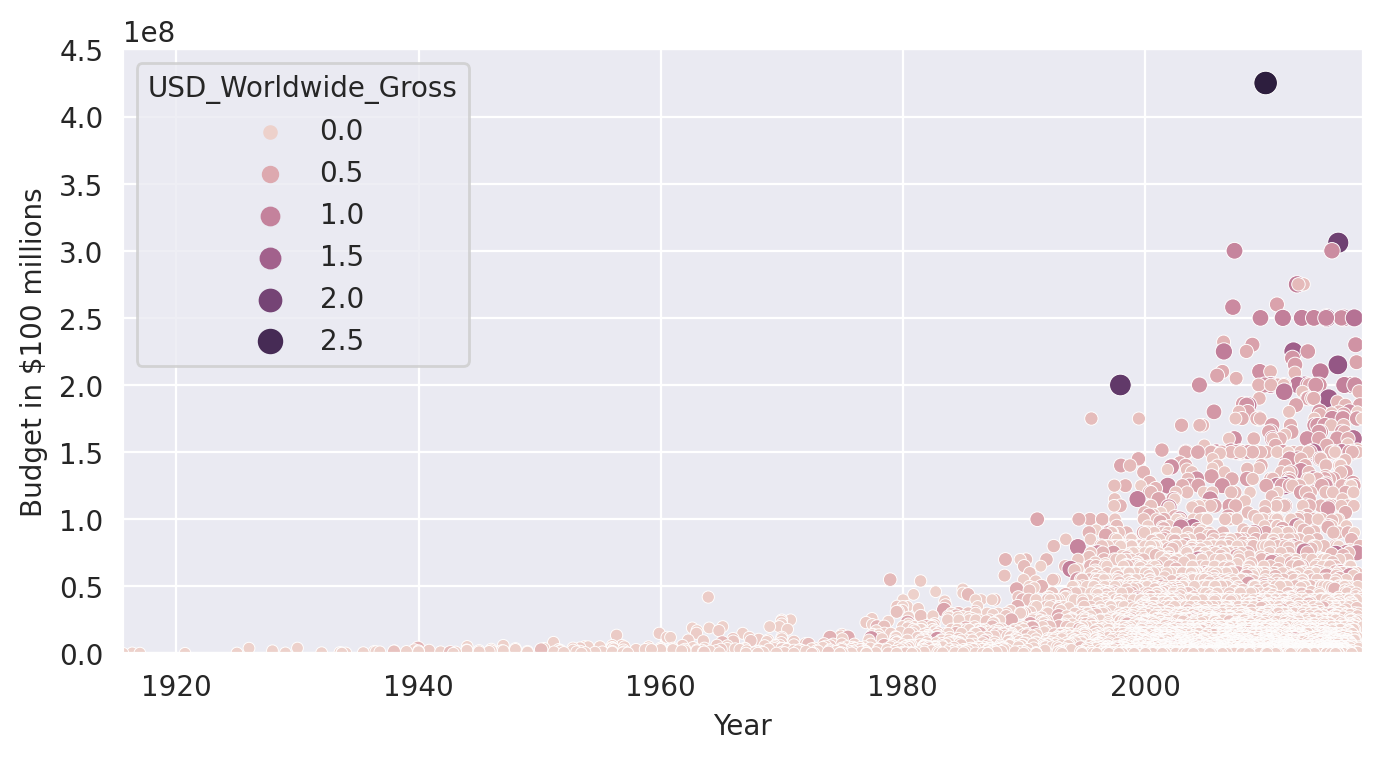

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')


# Floor Division: A Trick to Convert Years to Decades

In [ ]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year

In [ ]:
decades = years//10*10
data_clean['Decade'] = decades

In [ ]:
data_clean.head(5)

,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
Rank,,,,,,
1,2009-12-18,Avatar,425000000,2783918982,760507625,2000
2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225,2010
3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425,2000
4,2015-06-11,Spectre,300000000,879620923,200074175,2010
5,2012-07-20,The Dark Knight Rises,275000000,1084439099,448139099,2010


In [ ]:
old_films = data_clean.query("Decade < 1970")
old_films.sort_values("USD_Production_Budget", ascending=False)

,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
Rank,,,,,,
1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
...,...,...,...,...,...,...
5234,1933-09-02,She Done Him Wrong,200000,2000000,2000000,1930
5283,1942-11-16,Cat People,134000,8000000,4000000,1940
5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,1960


In [ ]:
new_films = data_clean.query("Decade >= 1970")

In [ ]:
new_films.sort_values("Decade", ascending=False)

,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
Rank,,,,,,
4167,2015-01-23,The Boy Next Door,4000000,52819253,35423380,2010
1594,2013-01-25,Parker,35000000,48543388,17616641,2010
1610,2015-09-30,The Walk,35000000,61173364,10137502,2010
3958,2013-09-13,Insidious Chapter 2,5000000,161921515,83586447,2010
1608,2015-06-03,Unfinished Business,35000000,12819501,10219501,2010
...,...,...,...,...,...,...
5049,1974-11-15,Benji,500000,31559560,31559560,1970
3165,1978-01-01,The Boys from Brazil,12000000,19000000,19000000,1970
3009,1978-01-01,Caravans,14000000,1000000,1000000,1970


# Plotting Linear Regressions with Seaborn

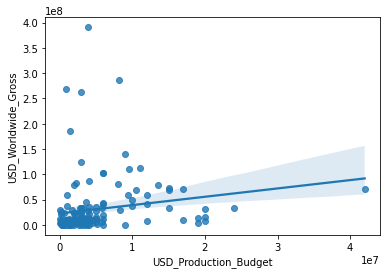

In [ ]:
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

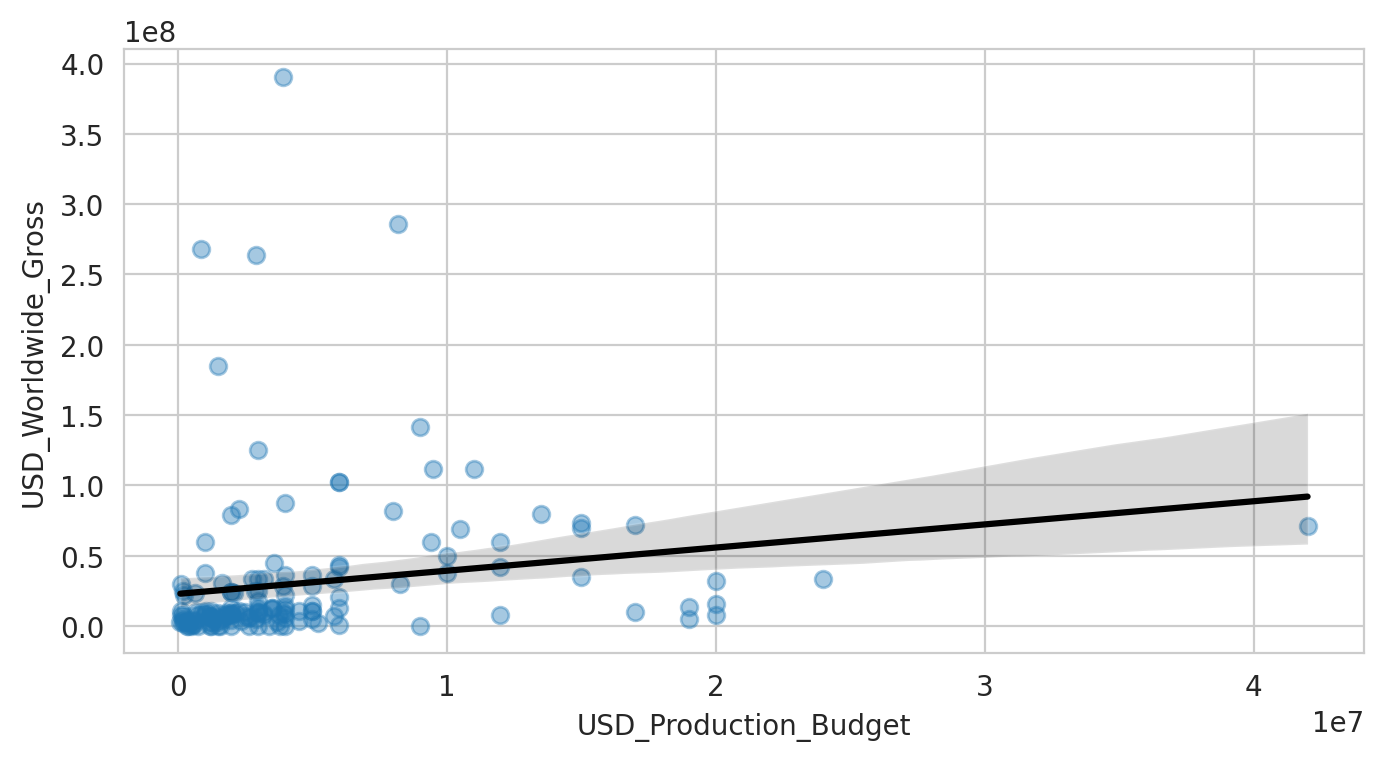

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

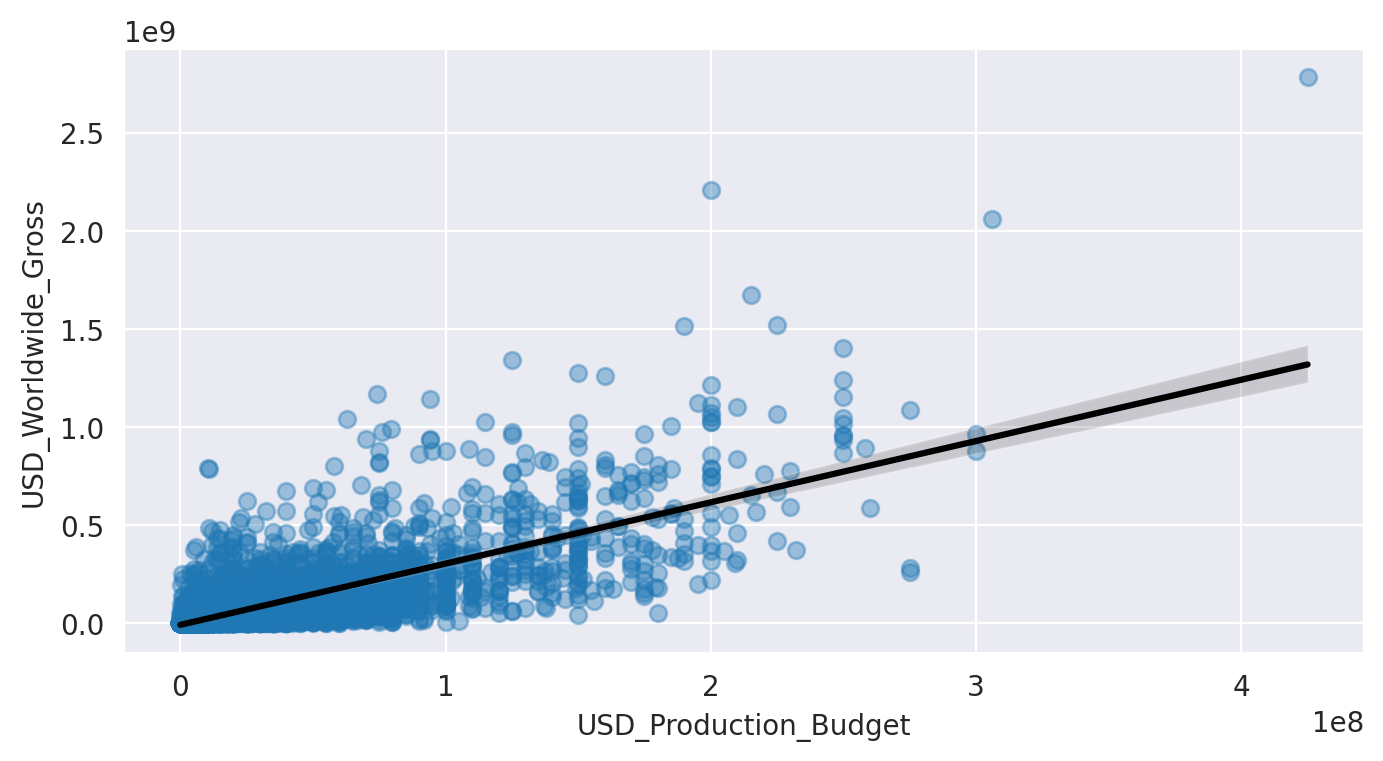

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

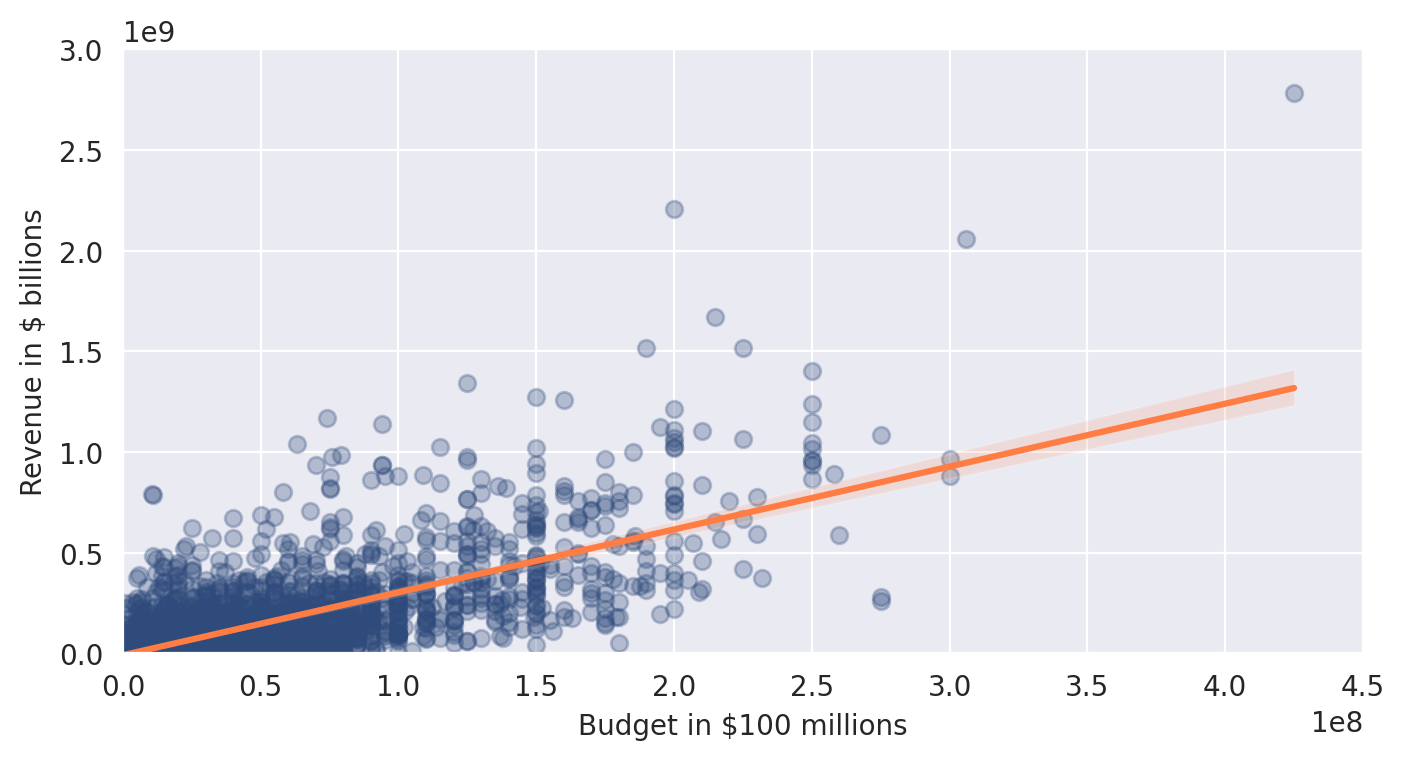

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 

# Use scikit-learn to Run Your Own Regression

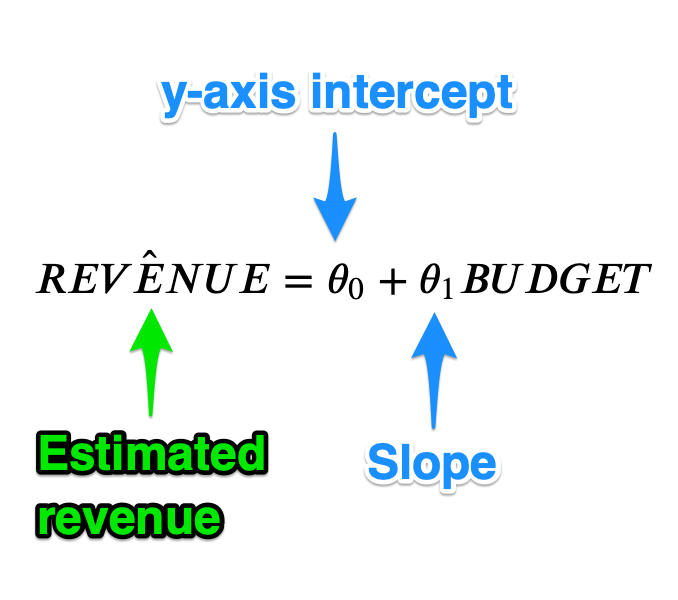

To find the best possible line, our regression will estimate the y-intercept ("theta zero") and the slope ("theta one"). The line's intercept on the y-axis tells us how much revenue a movie would make if the budget was 0. The slope tells us how much extra revenue we get for a $1 increase in the movie budget.

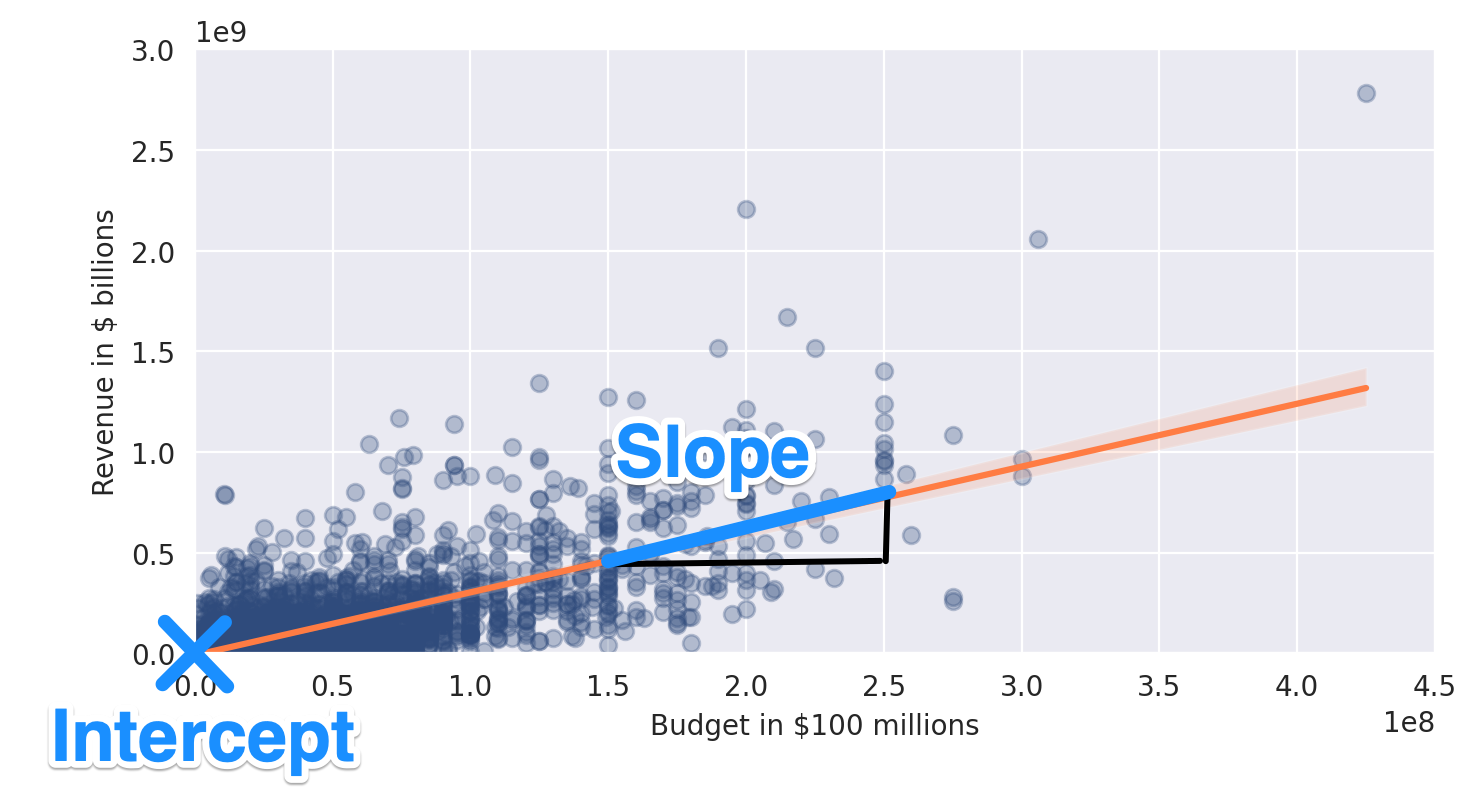

# scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
regression = LinearRegression()

In [ ]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 
regression.fit(X, y)

LinearRegression()

In [ ]:
regression.intercept_

array([-8650768.00661024])

How do we interpret the y-intercept? Literally, means that if a movie budget is 0, the estimated movie revenue is -$8.65 million.

In [ ]:
regression.coef_

array([[3.12259592]])

In [ ]:
regression.score(X, y)

0.5577032617720403

In [ ]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 
regression.fit(X, y)

LinearRegression()

In [ ]:
regression.intercept_


array([22821538.63508038])

In [ ]:
regression.coef_

array([[1.64771314]])

In [ ]:
regression.score(X, y)

0.02937258620576877

# Estimate a movie budget = 350000000

In [ ]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
